# Классификация

[ЗАДАНИЕ 3](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+MIPTDS+SEPT22/courseware/2106a0fdaa9a4325bd46abd052f042c3/1f36e61d6a2c446b822b06020e147b80/1?activate_block_id=block-v1%3ASkillFactory%2BMIPTDS%2BSEPT22%2Btype%40vertical%2Bblock%40bcb89ef901ab4963a30abca0c78de77d)
 

УСЛОВИЕ:
Скачиваем и работаем с данными [train.csv](https://lms.skillfactory.ru/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block@train.csv).

Необходимо произвести предобработку данных, обучить модели на алгоритмах, рассмотренных в уроках, оценить модели с помощью рассмотренных метрик и объяснить выбор определенной метрики.

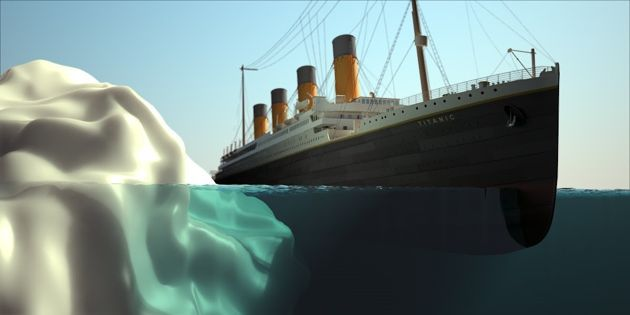

## Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
# from clf_utils import BlackBoxMethod, fetch_dataset # если есть доступ к файлу, раскомментить
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn.model_selection import train_test_split

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Звгрузка данных

In [ ]:
df = pd.read_csv('https://lms.skillfactory.ru/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block@train.csv') 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Переформируем данные для работы

In [ ]:
# Числовые данные
num_cols = [
    'Age',               # Возраст
    'Fare',              # Пассажирский тариф
    'SibSp',             # Количество родствеников
    'Parch',             # Количество дети/родители
]

# категориальные данные
cat_cols = [
    'Pclass',            # Класс билета
    'Sex',               # Пол
    'Embarked',          # Порт отправки C = Cherbourg, Q = Queenstown,S = Southampton
]

# "еще посмотрим" данные
poosible = [
    'Ticket',             # Билет
    'Cabin',              # Номер каюты
    'Name'                # Имя, включающее нужное для пустот в возрасте Mr, Mrs...
]


# целевые данные
target_col = 'Survived'  # Выживание


# новый порядок
cols = num_cols + cat_cols + poosible + [target_col]


# Словарь для смены имен колонок
dict_column = {
    'Age'    : 'Возраст',
    'Fare'   : 'Тариф',
    'SibSp'  : 'Родственики',
    'Parch'  : 'Дети_родители',
    'Pclass' : 'Класс', 
    'Sex'    : 'Пол',
    'Ticket' : 'Билет',
    'Embarked' : 'Порт_отправки', #  C = Cherbourg, Q = Queenstown,S = Southampton
    'Cabin'    : 'Каюта',
    'Name'     : 'Пассажир', # Имя, включающее нужное для пустот в возрасте Mr, Mrs...
    'Survived' : 'Спасен'

    
}

In [ ]:
# Перераспределим колонки в новый датасет для работы
data = df[cols]
# Переименуем
data.rename(columns = dict_column, inplace = True)
display(data)

,Возраст,Тариф,Родственики,Дети_родители,Класс,Пол,Порт_отправки,Билет,Каюта,Пассажир,Спасен
0,22.0,7.2500,1,0,3,male,S,A/5 21171,NaN,"Braund, Mr. Owen Harris",0
1,38.0,71.2833,1,0,1,female,C,PC 17599,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,26.0,7.9250,0,0,3,female,S,STON/O2. 3101282,NaN,"Heikkinen, Miss. Laina",1
3,35.0,53.1000,1,0,1,female,S,113803,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,35.0,8.0500,0,0,3,male,S,373450,NaN,"Allen, Mr. William Henry",0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,2,male,S,211536,NaN,"Montvila, Rev. Juozas",0
887,19.0,30.0000,0,0,1,female,S,112053,B42,"Graham, Miss. Margaret Edith",1
888,NaN,23.4500,1,2,3,female,S,W./C. 6607,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,26.0,30.0000,0,0,1,male,C,111369,C148,"Behr, Mr. Karl Howell",1


In [ ]:
# смотрим как с полом
data['Пол'].value_counts()

male      577
female    314
Name: Пол, dtype: int64

In [ ]:
# Пол в класс сразу
data['Пол'] = data['Пол'].replace(['male','female'], [1,0]).astype(int)
data.tail()

,Возраст,Тариф,Родственики,Дети_родители,Класс,Пол,Порт_отправки,Билет,Каюта,Пассажир,Спасен
886,27.0,13.00,0,0,2,1,S,211536,NaN,"Montvila, Rev. Juozas",0
887,19.0,30.00,0,0,1,0,S,112053,B42,"Graham, Miss. Margaret Edith",1
888,NaN,23.45,1,2,3,0,S,W./C. 6607,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,26.0,30.00,0,0,1,1,C,111369,C148,"Behr, Mr. Karl Howell",1
890,32.0,7.75,0,0,3,1,Q,370376,NaN,"Dooley, Mr. Patrick",0


In [ ]:
# Посмотрим на распределение категориальных фичей
for col in cat_cols:
    col_name = dict_column[col]
    print(f"{col_name} Распределение")
    print(data[col_name].value_counts())
    print()

Класс Распределение
3    491
1    216
2    184
Name: Класс, dtype: int64

Пол Распределение
1    577
0    314
Name: Пол, dtype: int64

Порт_отправки Распределение
S    644
C    168
Q     77
Name: Порт_отправки, dtype: int64



In [ ]:
# Посмотрим на пропущенные значения
data.isna().mean()

Возраст          0.198653
Тариф            0.000000
Родственики      0.000000
Дети_родители    0.000000
Класс            0.000000
Пол              0.000000
Порт_отправки    0.002245
Билет            0.000000
Каюта            0.771044
Пассажир         0.000000
Спасен           0.000000
dtype: float64

Есть проблемы с Возрастом, Портом отправки, Каютой
- `Возраст` - увидел интересную идею из задания возраста от указания в имени  `Mr, Mrs...`, через создание новой колонки и заполнение средним из группы
- `Каюта` - в другом месте нашел подсказку, что тут смысл в том, что отдельная каюта или без каюты, то есть стоит добавить тип `Non'
- `Порт_отправки` - тут скорее наиболее верным заполнение по моде будет, из наиблее частого места отправки, так как пропусков мало    

# Посмотрим распределение в данных
***

работа с `sns`:
- https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/
- https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Возраст        714 non-null    float64
 1   Тариф          891 non-null    float64
 2   Родственики    891 non-null    int64  
 3   Дети_родители  891 non-null    int64  
 4   Класс          891 non-null    int64  
 5   Пол            891 non-null    int64  
 6   Порт_отправки  889 non-null    object 
 7   Билет          891 non-null    object 
 8   Каюта          204 non-null    object 
 9   Пассажир       891 non-null    object 
 10  Спасен         891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


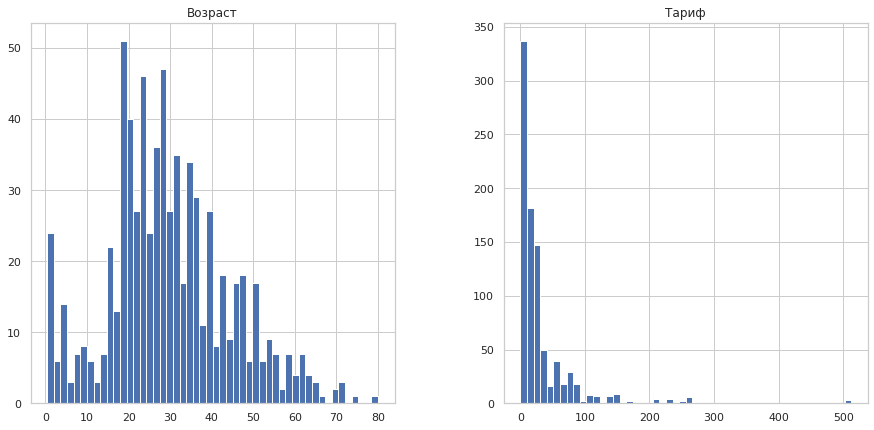

In [ ]:
num_attributes = data.select_dtypes(include=['float64'])
num_attributes.hist(bins=50,figsize=(15,7));

- преобладание дешевых тарифов
- преобладание в группе 20-30 лет

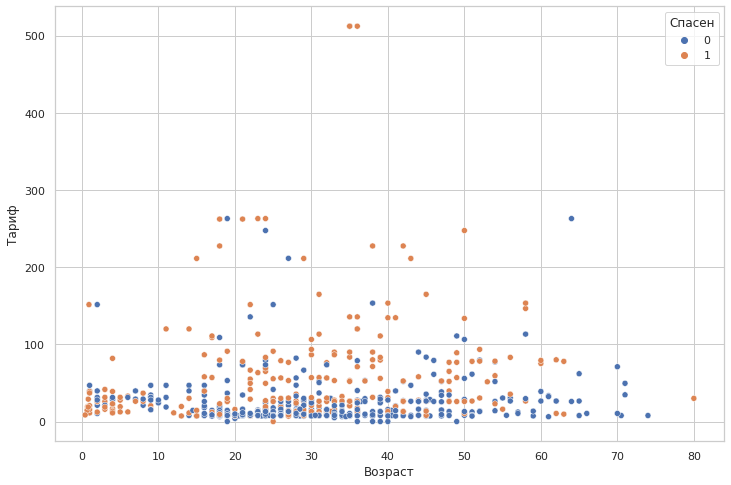

In [ ]:
sns.set(style="whitegrid", rc={'figure.figsize':(12, 8)})
sns.scatterplot(x="Возраст", y="Тариф",  data=data, hue='Спасен');

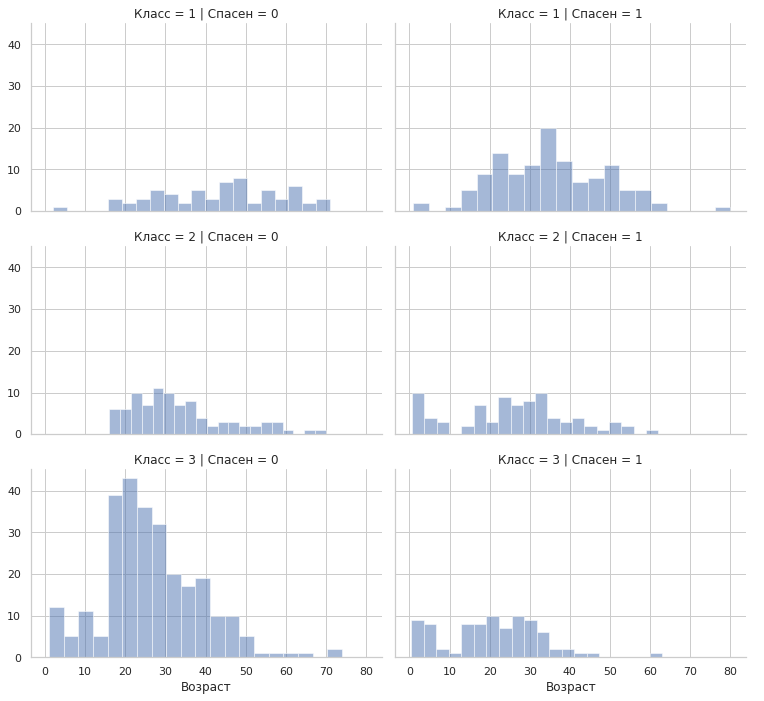

In [ ]:
grid = sns.FacetGrid(data, col='Спасен', row='Класс', height = 3.3, aspect=1.6)
grid.map(plt.hist, 'Возраст', alpha=.5, bins=20)
grid.add_legend();

Видны перекосы в 1м и 3м классе

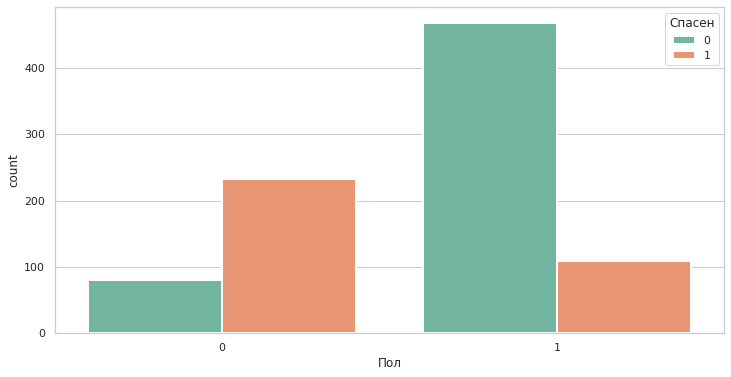

In [ ]:
plt.subplots(figsize = (12,6))
ax = sns.countplot(x = "Пол", 
                   hue="Спасен",
                   data = data,
                   palette='Set2',
                   linewidth=2)


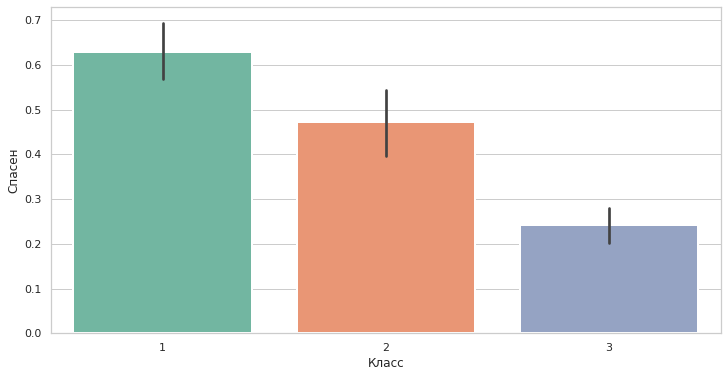

In [ ]:
plt.subplots(figsize = (12,6))
sns.barplot(x = "Класс", y = "Спасен", data=data,
            palette='Set2',
            edgecolor=(1,1,1), linewidth=2);

Явный акцент в 1й класс к спасению

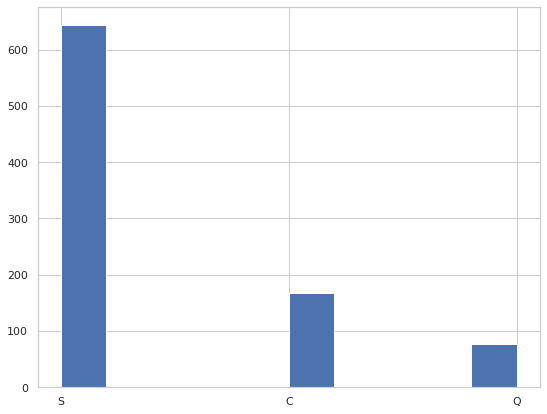

In [ ]:
data["Порт_отправки"].hist(bins=10,figsize=(9,7));

Больше всего из Southampton

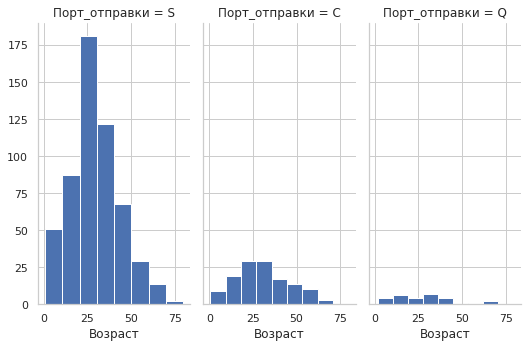

In [ ]:
g = sns.FacetGrid(data, col="Порт_отправки",height=5, aspect=.5);
g = g.map(plt.hist, "Возраст",  edgecolor = 'white', bins=8);

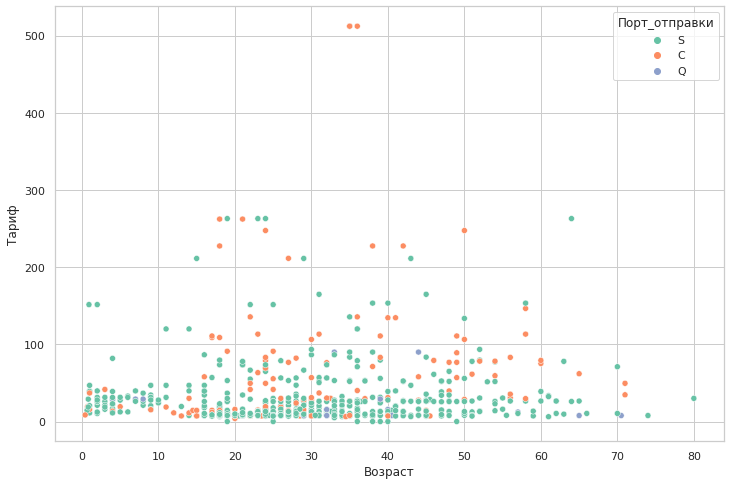

In [ ]:
sns.scatterplot(x="Возраст", palette='Set2', y="Тариф",  data=data, hue='Порт_отправки');

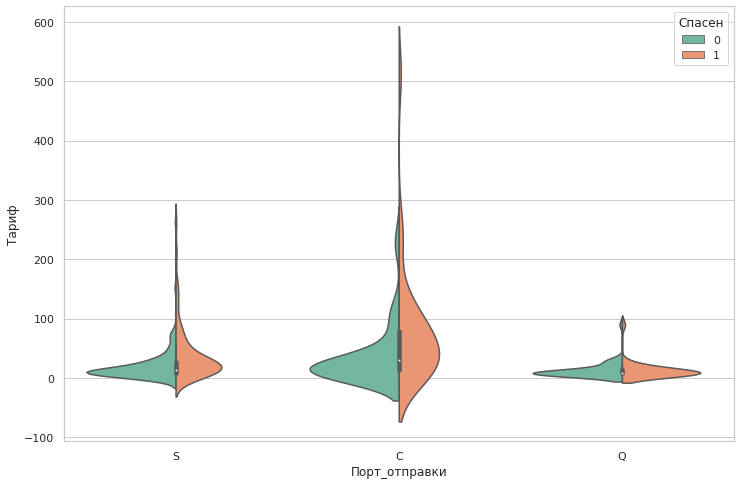

In [ ]:
# Распределение по Полу Тарифа от места отправки
sns.violinplot(
    x="Порт_отправки", y="Тариф", data=data, hue='Спасен', split=True, palette='Set2');

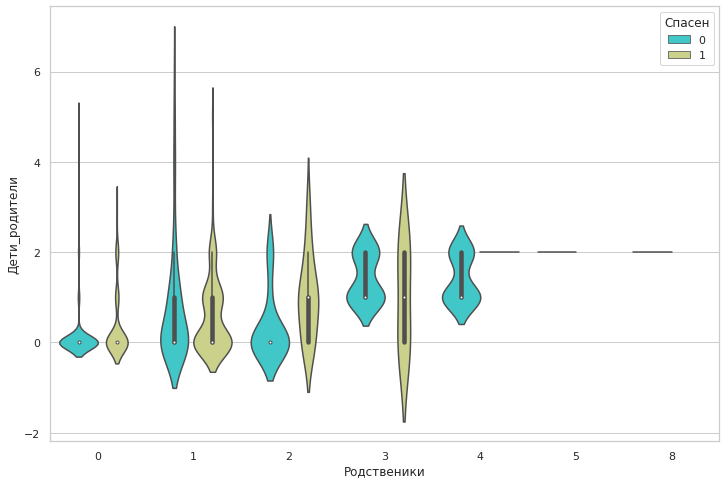

In [ ]:
sns.violinplot(x="Родственики", y="Дети_родители", hue='Спасен', data=data, palette='rainbow');

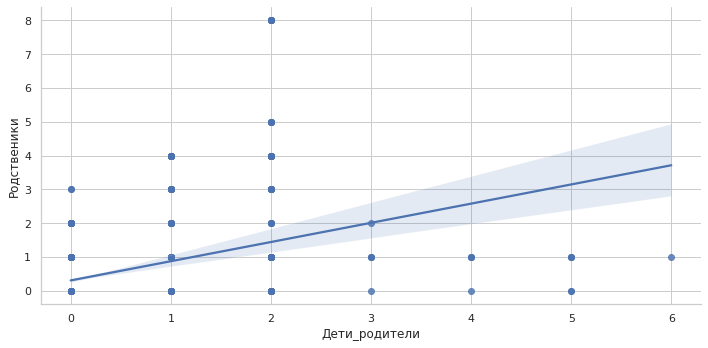

In [ ]:
sns.lmplot(x="Дети_родители", y="Родственики", size=5, aspect=2, data=data);

Стоит и то и то собрать в один признак скорее

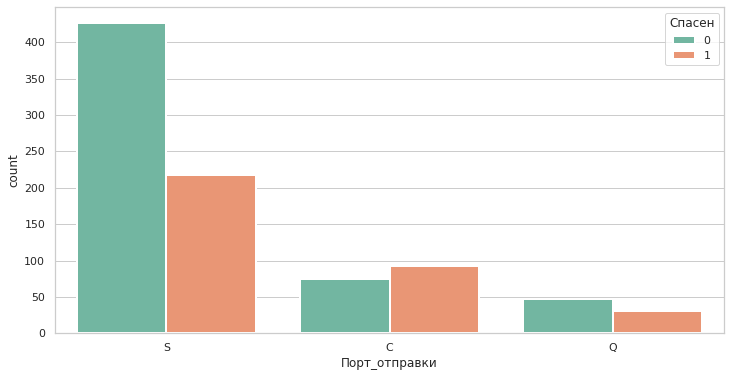

In [ ]:
plt.subplots(figsize = (12,6))
ax = sns.countplot(x = "Порт_отправки", 
                   hue="Спасен",
                   data = data,
                   palette='Set2',
                   linewidth=2)

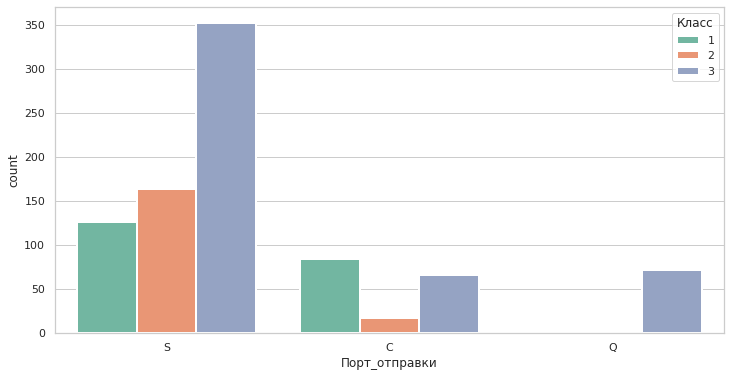

In [ ]:
plt.subplots(figsize = (12,6))
ax = sns.countplot(x = "Порт_отправки", 
                   hue="Класс",
                   data = data,
                   palette='Set2',
                   linewidth=2)

Наибольшая часть погибших была в 3м классе и поэтому диспропорция в погибщих из Southampton

# Посмотрим зависимость спасенных/неспасенных от возраста.
***

In [ ]:
# Список диапазонов возрастов
age_interval_list = [
  [0, 5],
  [6, 10],
  [11, 15],
  [16, 20],
  [21, 25],
  [26, 30],
  [31, 35],
  [36, 40],
  [41, 45],
  [46, 50],
  [51, 55],
  [61, 65],
  [66, 70],
  [71, 75],
  [76, 80],
  [81, 85],

]

In [ ]:
range(age_interval_list[0][0],age_interval_list[0][1])

range(0, 5)

In [ ]:
# Функция переводит в проценты группы людей
def get_icome_age_prc(title, df_m, df_p, betta):
  minus = df_m.shape[0]
  plus = df_p.shape[0]
  minus_p = minus*100/(minus + plus + betta)
  plus_p = plus*100/(minus + plus+ + betta)
  print(f'{title}, не выжил: {minus}, {round(minus_p, 2)}%, спасен: {plus}, {round(plus_p, 2)}%')
  return minus_p, plus_p

In [ ]:
age_list = []
income_age_died_list = []
income_age_safe_list = []
for i in range(len(age_interval_list)):
  df_died = data[(data['Возраст'] >= age_interval_list[i][0]) & (data['Возраст'] <= age_interval_list[i][1]) & (data['Спасен'] == 0)]
  df_safe = data[(data['Возраст'] >= age_interval_list[i][0]) & (data['Возраст'] <= age_interval_list[i][1]) & (data['Спасен'] == 1)]
  died, safe = get_icome_age_prc(f'Возраст: {age_interval_list[i][0]} - {age_interval_list[i][1]}', df_died, df_safe, 0.00001)
  age_list.append(age_interval_list[i][1])
  income_age_died_list.append(round(died,2))
  income_age_safe_list.append(round(safe,2))


Возраст: 0 - 5, не выжил: 13, 29.55%, спасен: 31, 70.45%
Возраст: 6 - 10, не выжил: 13, 65.0%, спасен: 7, 35.0%
Возраст: 11 - 15, не выжил: 8, 42.11%, спасен: 11, 57.89%
Возраст: 16 - 20, не выжил: 63, 65.62%, спасен: 33, 34.37%
Возраст: 21 - 25, не выжил: 79, 65.29%, спасен: 42, 34.71%
Возраст: 26 - 30, не выжил: 66, 61.11%, спасен: 42, 38.89%
Возраст: 31 - 35, не выжил: 45, 52.33%, спасен: 41, 47.67%
Возраст: 36 - 40, не выжил: 39, 58.21%, спасен: 28, 41.79%
Возраст: 41 - 45, не выжил: 28, 62.22%, спасен: 17, 37.78%
Возраст: 46 - 50, не выжил: 21, 56.76%, спасен: 16, 43.24%
Возраст: 51 - 55, не выжил: 14, 58.33%, спасен: 10, 41.67%
Возраст: 61 - 65, не выжил: 10, 71.43%, спасен: 4, 28.57%
Возраст: 66 - 70, не выжил: 3, 100.0%, спасен: 0, 0.0%
Возраст: 71 - 75, не выжил: 3, 100.0%, спасен: 0, 0.0%
Возраст: 76 - 80, не выжил: 0, 0.0%, спасен: 1, 100.0%
Возраст: 81 - 85, не выжил: 0, 0.0%, спасен: 0, 0.0%


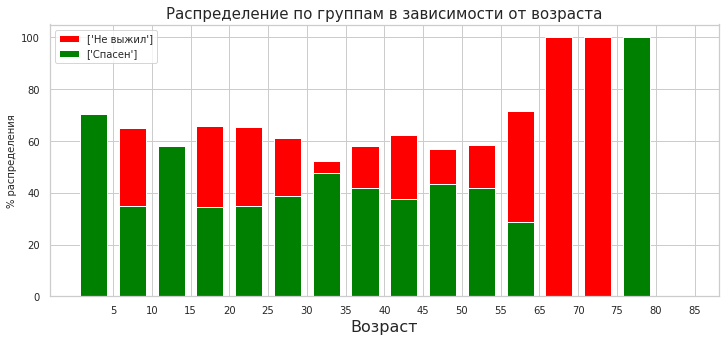

In [450]:
plt.figure(figsize=(12, 5))
plt.title(label = 'Распределение по группам в зависимости от возраста', fontsize=15)
plt.xlabel('Возраст', fontsize=16)
plt.ylabel('% распределения', fontsize=10)

x = np.arange(len(age_list))
width = 0.7  # the width of the bars
plt.bar(x-0.5, income_age_died_list, width, label=['Не выжил'], color='red')
plt.bar(x-0.5, income_age_safe_list, width, label=['Спасен'], color='green')
plt.legend(loc='upper left', fontsize=10)
plt.xticks(x, age_list, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

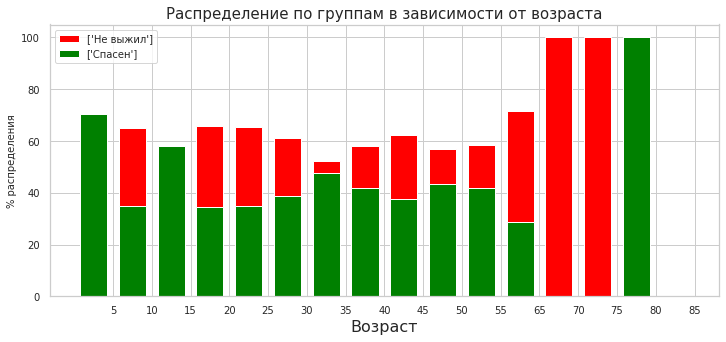

- До 30 примерно одинаковое распределение спасен/нет
- хотя грудные и подроски выжили все
- с 30 до 55 преобладают выживщие
- с 55 идет падение и акцент в невыживших
- в конце после 75 скорее исключение(выброс) из-за того, что один только, можно будет исключить.

#Таблично

In [ ]:
survived_summary = data.groupby("Спасен")
survived_summary.mean()

,Возраст,Тариф,Родственики,Дети_родители,Класс,Пол
Спасен,,,,,,
0,30.626179,22.117887,0.553734,0.329690,2.531876,0.852459
1,28.343690,48.395408,0.473684,0.464912,1.950292,0.318713


In [ ]:
survived_summary = data.groupby('Пол')
survived_summary.mean()

,Возраст,Тариф,Родственики,Дети_родители,Класс,Спасен
Пол,,,,,,
0,27.915709,44.479818,0.694268,0.649682,2.159236,0.742038
1,30.726645,25.523893,0.429809,0.235702,2.389948,0.188908


In [ ]:
survived_summary = data.groupby("Класс")
survived_summary.mean()

,Возраст,Тариф,Родственики,Дети_родители,Пол,Спасен
Класс,,,,,,
1,38.233441,84.154687,0.416667,0.356481,0.564815,0.629630
2,29.877630,20.662183,0.402174,0.380435,0.586957,0.472826
3,25.140620,13.675550,0.615071,0.393075,0.706721,0.242363



Стастические данные говорят.
- только 38% из 891 спаслись в этой трагедии
- ~74% мужчин спаслось, тогда как толко  ~19% женщин спаслось. 
- ~63% первого класса спаслось, против 24% спасшихся из 3го класса.



#Корреляционная и тепловая матрицы
***

In [ ]:
## Корреляция целевого параметра и остальных
data.corr()['Спасен']

Возраст         -0.077221
Тариф            0.257307
Родственики     -0.035322
Дети_родители    0.081629
Класс           -0.338481
Пол             -0.543351
Спасен           1.000000
Name: Спасен, dtype: float64

In [ ]:
## Сортировка по степени корреляции 
corr = data.corr()**2
corr['Спасен'].sort_values(ascending=False)

Спасен           1.000000
Пол              0.295231
Класс            0.114569
Тариф            0.066207
Дети_родители    0.006663
Возраст          0.005963
Родственики      0.001248
Name: Спасен, dtype: float64

Большая связь с классом и тарифом

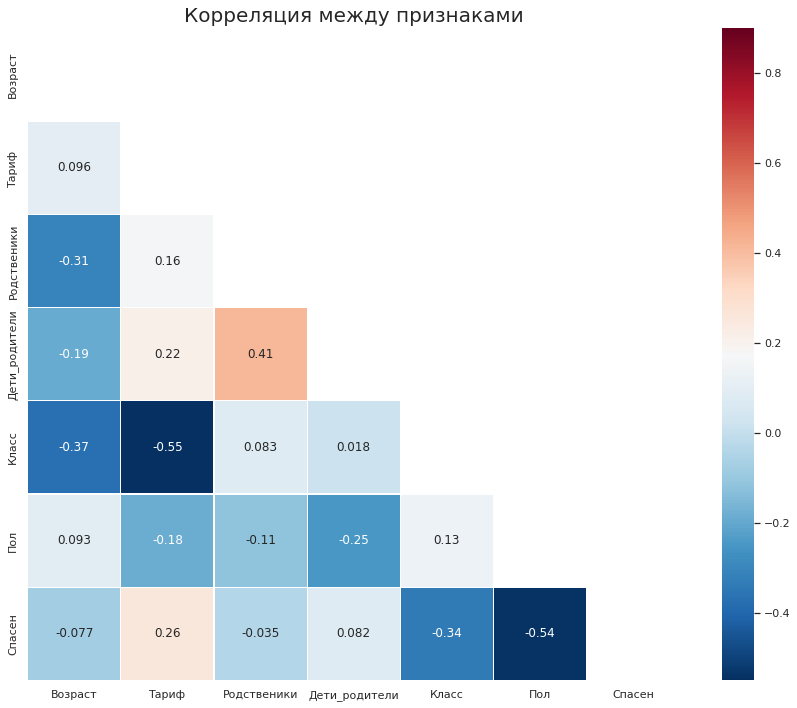

In [ ]:
## Тоже в виде тепловой карты в треугольном виде
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Корреляция между признаками", y = 1.03,fontsize = 20);

# Заполнение данных
***

## Возраст

заполним за счет получения дополнительных груп из колонки Пассажир

In [ ]:
data['Тип'] = data['Пассажир'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
data['Тип'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Тип, dtype: int64

In [ ]:
for t in list(set(data['Тип'])):
  if t not in ['Mrs', 'Miss', 'Mr']:
     data['Тип'] = data['Тип'].replace([t], ['others'])

In [ ]:
data['Тип'].value_counts()

Mr        517
Miss      182
Mrs       125
others     67
Name: Тип, dtype: int64

Сгруппируем по полу и типу для определения и замены уже медианы по группе 
[подсказку кода тут нашел](https://coderoad.ru/47457886/%D0%9A%D0%B0%D0%BA-%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C-%D1%81%D1%80%D0%B5%D0%B7-DataFrame-%D0%B8-fillna-%D0%B2-%D0%BA%D0%BE%D0%BD%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D0%BE%D0%BC-%D1%81%D1%80%D0%B5%D0%B7%D0%B5-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F-Python-Pandas)

In [ ]:
data['Возраст'] = data.groupby(["Пол","Тип"])["Возраст"].apply(lambda x: x.fillna(x.median()))

## Порт и каюта

In [ ]:
# Порт отправки заполненим медианой
data.loc[data[data['Порт_отправки'].isna()].index ,'Порт_отправки'] = data['Порт_отправки'].mode()[0]

# Коюту дополним значение "Non"
data['Каюта'] = data['Каюта'].fillna('Non')

display(data)

,Возраст,Тариф,Родственики,Дети_родители,Класс,Пол,Порт_отправки,Билет,Каюта,Пассажир,Спасен,Тип
0,22.0,7.2500,1,0,3,1,S,A/5 21171,Non,"Braund, Mr. Owen Harris",0,Mr
1,38.0,71.2833,1,0,1,0,C,PC 17599,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Mrs
2,26.0,7.9250,0,0,3,0,S,STON/O2. 3101282,Non,"Heikkinen, Miss. Laina",1,Miss
3,35.0,53.1000,1,0,1,0,S,113803,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Mrs
4,35.0,8.0500,0,0,3,1,S,373450,Non,"Allen, Mr. William Henry",0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,2,1,S,211536,Non,"Montvila, Rev. Juozas",0,others
887,19.0,30.0000,0,0,1,0,S,112053,B42,"Graham, Miss. Margaret Edith",1,Miss
888,21.0,23.4500,1,2,3,0,S,W./C. 6607,Non,"Johnston, Miss. Catherine Helen ""Carrie""",0,Miss
889,26.0,30.0000,0,0,1,1,C,111369,C148,"Behr, Mr. Karl Howell",1,Mr


In [ ]:
data.isna().mean()

Возраст          0.0
Тариф            0.0
Родственики      0.0
Дети_родители    0.0
Класс            0.0
Пол              0.0
Порт_отправки    0.0
Билет            0.0
Каюта            0.0
Пассажир         0.0
Спасен           0.0
Тип              0.0
dtype: float64

С пропусками чисто теперь

# Доработаем другие данные данных
***

## Каюта

In [ ]:
data['Каюта'].value_counts()


Non            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Каюта, Length: 148, dtype: int64

In [ ]:
print(sorted(data['Каюта'].unique()))


['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18', 'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34', 'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50', 'E58', 'E63', 'E67'

В Первой группе тип каюты связанный с расположением в корабли и может нести зависимость. У некоторых номера сгруппированы и скорее говорит о связи семейной, но это у нас есть в других данных и для упрощения учтем только первую группу для разбиения на подгруппы

In [ ]:
data['Зона'] = data['Каюта'].apply(lambda x: x[0] if x not in ('Non', 'T') else x)

In [ ]:
data['Зона'].value_counts()

Non    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Зона, dtype: int64

## Билет
конвертируем данные в билете в новый признак

In [ ]:
print(sorted(data['Билет'].unique()))


['110152', '110413', '110465', '110564', '110813', '111240', '111320', '111361', '111369', '111426', '111427', '111428', '112050', '112052', '112053', '112058', '112059', '112277', '112379', '113028', '113043', '113050', '113051', '113055', '113056', '113059', '113501', '113503', '113505', '113509', '113510', '113514', '113572', '113760', '113767', '113773', '113776', '113781', '113783', '113784', '113786', '113787', '113788', '113789', '113792', '113794', '113796', '113798', '113800', '113803', '113804', '113806', '113807', '11668', '11751', '11752', '11753', '11755', '11765', '11767', '11769', '11771', '11774', '11813', '11967', '12233', '12460', '12749', '13049', '13213', '13214', '13502', '13507', '13509', '13567', '13568', '14311', '14312', '14313', '14973', '1601', '16966', '16988', '17421', '17453', '17463', '17464', '17465', '17466', '17474', '17764', '19877', '19928', '19943', '19947', '19950', '19952', '19972', '19988', '19996', '2003', '211536', '21440', '218629', '219533', 

In [ ]:
data['Билет'].value_counts().head(15)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
Name: Билет, dtype: int64

Сделаем черту Группа

In [ ]:
group_tikets = data['Билет'].value_counts()

data['Группа'] = data['Билет'].apply(lambda x: group_tikets[x])

In [ ]:
data['Группа'].value_counts()

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Группа, dtype: int64

## Родственики и Дети
Соберм в один признак

In [ ]:
data['Семья'] = data['Родственики'] + data['Дети_родители']
data['Семья'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Семья, dtype: int64

## Тариф

разделим методом qcut, [подсказка тут](https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/%D0%A0%D0%B0%D0%B7%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B2%20Pandas%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20qcut%20%D0%B8%20cut.ipynb#scrollTo=-UjYwMqStqiP)

In [ ]:
data['Тариф'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Тариф, Length: 248, dtype: int64

In [ ]:
tarif = ['Low','Low_Mid','Mid', 'High_Mid','High', 'Up']
_, levels = pd.qcut(data['Тариф'],
                            q=6,
                            labels=tarif,
                            retbins=True)

In [ ]:
data['Уровень_тарифа'] = pd.cut(data['Тариф'], bins=levels, labels=tarif)
data['Уровень_тарифа'].value_counts()


Low_Mid     152
High_Mid    149
Up          149
High        146
Low         141
Mid         139
Name: Уровень_тарифа, dtype: int64

## Возраст

Используем выше созданное уже деление по возрастам для разбиения на подгруппы возрастов

In [ ]:
def age_group_fun(age):
    a = 0
    for i, diap in enumerate(age_interval_list):
      if age >= diap[0] and age < diap[1]: a = i
    return a
        

In [ ]:
data['Возрастная_группа'] = data['Возраст'].map(age_group_fun)
data['Возрастная_группа'].value_counts()

0     337
4     134
5      83
3      81
6      68
7      54
8      33
9      27
1      23
10     22
2      14
11     11
13      3
12      1
Name: Возрастная_группа, dtype: int64

In [ ]:
display(data)

,Возраст,Тариф,Родственики,Дети_родители,Класс,Пол,Порт_отправки,Билет,Каюта,Пассажир,Спасен,Тип,Зона,Группа,Семья,Уровень_тарифа,Возрастная_группа
0,22.0,7.2500,1,0,3,1,S,A/5 21171,Non,"Braund, Mr. Owen Harris",0,Mr,Non,1,1,Low,4
1,38.0,71.2833,1,0,1,0,C,PC 17599,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Mrs,C,1,1,Up,7
2,26.0,7.9250,0,0,3,0,S,STON/O2. 3101282,Non,"Heikkinen, Miss. Laina",1,Miss,Non,1,0,Low_Mid,5
3,35.0,53.1000,1,0,1,0,S,113803,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Mrs,C,2,1,Up,0
4,35.0,8.0500,0,0,3,1,S,373450,Non,"Allen, Mr. William Henry",0,Mr,Non,1,0,Low_Mid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,2,1,S,211536,Non,"Montvila, Rev. Juozas",0,others,Non,1,0,Mid,5
887,19.0,30.0000,0,0,1,0,S,112053,B42,"Graham, Miss. Margaret Edith",1,Miss,B,1,0,High,3
888,21.0,23.4500,1,2,3,0,S,W./C. 6607,Non,"Johnston, Miss. Catherine Helen ""Carrie""",0,Miss,Non,2,3,High_Mid,4
889,26.0,30.0000,0,0,1,1,C,111369,C148,"Behr, Mr. Karl Howell",1,Mr,C,1,0,High,5


# Удаление и перевод в One-Hot
***

In [ ]:
data.drop(['Возраст', 'Тариф','Родственики', 'Дети_родители', 'Билет', 'Каюта', 'Пассажир'], axis=1, inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=['Класс', "Порт_отправки",'Тип','Зона','Группа', 'Семья', 'Уровень_тарифа', 'Возрастная_группа'], drop_first=True)

In [ ]:
display(data)

,Пол,Спасен,Класс_2,Класс_3,Порт_отправки_Q,Порт_отправки_S,Тип_Mr,Тип_Mrs,Тип_others,Зона_B,...,Возрастная_группа_4,Возрастная_группа_5,Возрастная_группа_6,Возрастная_группа_7,Возрастная_группа_8,Возрастная_группа_9,Возрастная_группа_10,Возрастная_группа_11,Возрастная_группа_12,Возрастная_группа_13
0,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
887,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
889,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Подготовка данных к обучению
***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Распределяем на данные и целевые метки
X = data.drop(['Спасен'], axis=1)
y = data["Спасен"]

In [413]:
# Разделяем данные
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .27,  random_state=8,  stratify=y)

In [303]:
# Приводим данные к одному диапозону
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [414]:
len(X.columns)

48

# Обучение моделей
***

Берем код лекции

In [415]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score,classification_report, precision_recall_curve

def try_model(model, X_train, y_train, X_test, y_test, model_params=None):
    if model_params is None:
        model_params = dict()
    print(model.__name__)
    pipeline = make_pipeline(StandardScaler(), model(**model_params))
    pipeline.fit(X_train, y_train)

    # Для проверки данных внутри функции
    #sc = StandardScaler()
    #x_train_sc = sc.fit_transform(X_train)
    #x_test_sc = sc.transform(X_test)

    y_pred = pipeline.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.legend()

    print()
    print(classification_report(y_test, y_pred, labels=pipeline.classes_))
    print(confusion_matrix(y_pred, y_test))

    #for sklearn.__version__ of 1.0 and above
    display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    display.plot()
    plt.show()
    return pipeline

## LogisticRegression

LogisticRegression
Accuracy: 0.8381742738589212
Precision: 0.7872340425531915
Recall: 0.7956989247311828
F1 score: 0.7914438502673796

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       148
           1       0.79      0.80      0.79        93

    accuracy                           0.84       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.84      0.84      0.84       241

[[128  19]
 [ 20  74]]


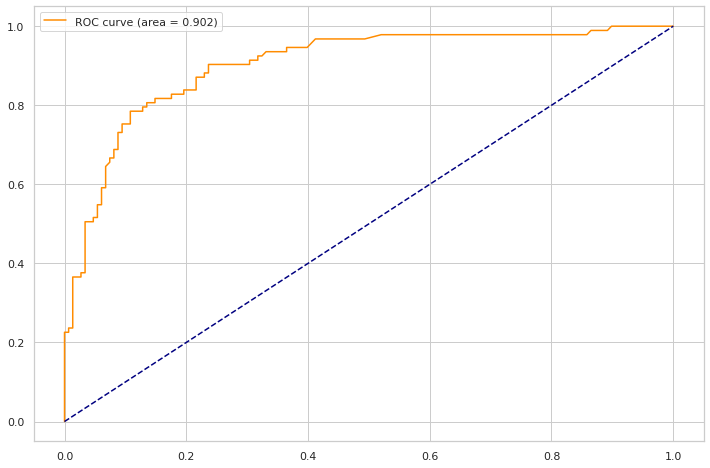

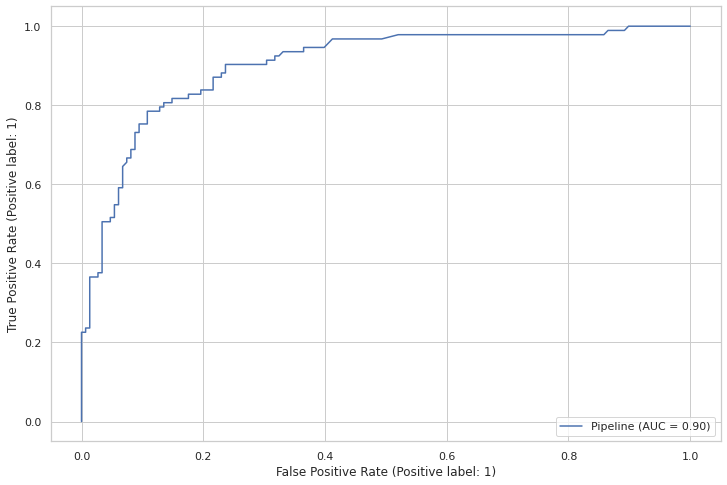

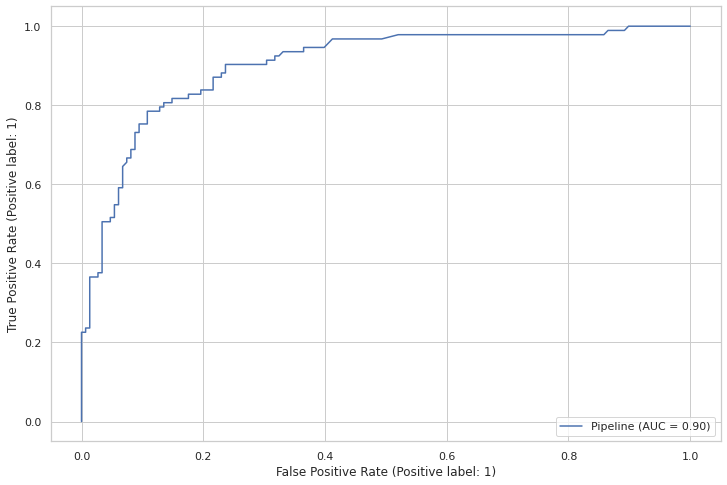

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [416]:
param = {'solver':'liblinear', 'penalty':'l1'}
try_model(LogisticRegression, x_train, y_train, x_test, y_test, param)

## GaussianNB

GaussianNB
Accuracy: 0.4190871369294606
Precision: 0.39737991266375544
Recall: 0.978494623655914
F1 score: 0.5652173913043479

              precision    recall  f1-score   support

           0       0.83      0.07      0.13       148
           1       0.40      0.98      0.57        93

    accuracy                           0.42       241
   macro avg       0.62      0.52      0.35       241
weighted avg       0.67      0.42      0.29       241

[[ 10   2]
 [138  91]]


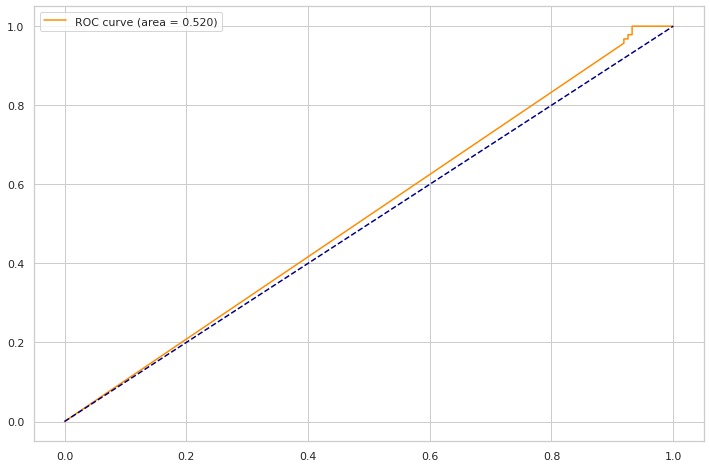

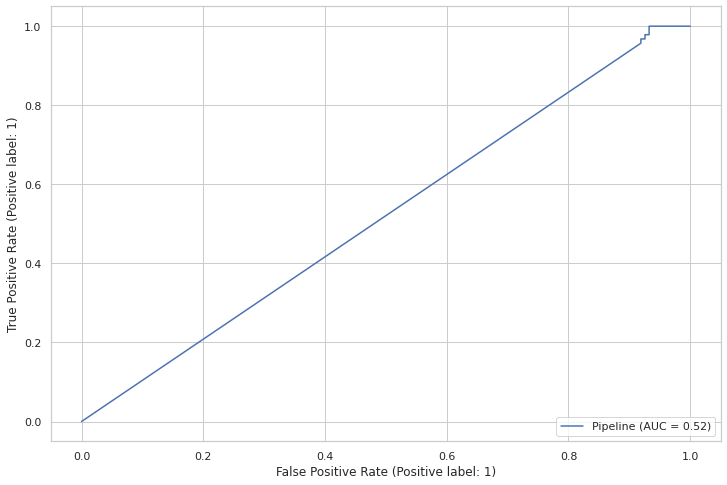

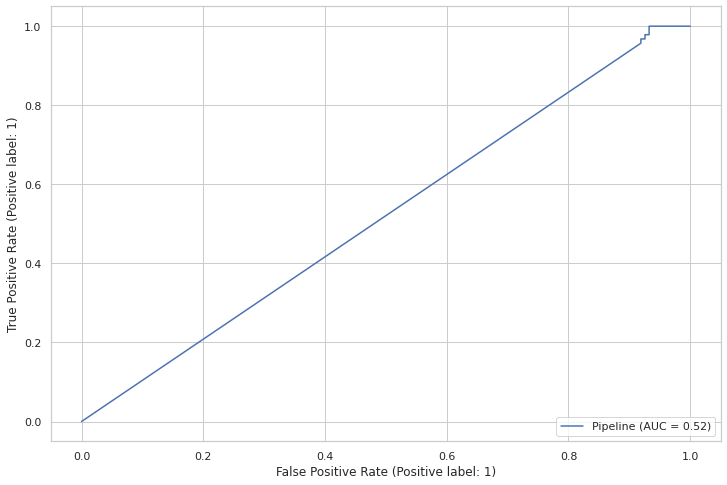

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [417]:
try_model(GaussianNB, x_train, y_train, x_test, y_test)

## KNeighborsClassifier

KNeighborsClassifier
Accuracy: 0.7800829875518672
Precision: 0.8448275862068966
Recall: 0.5268817204301075
F1 score: 0.6490066225165563

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       148
           1       0.84      0.53      0.65        93

    accuracy                           0.78       241
   macro avg       0.80      0.73      0.74       241
weighted avg       0.79      0.78      0.77       241

[[139  44]
 [  9  49]]


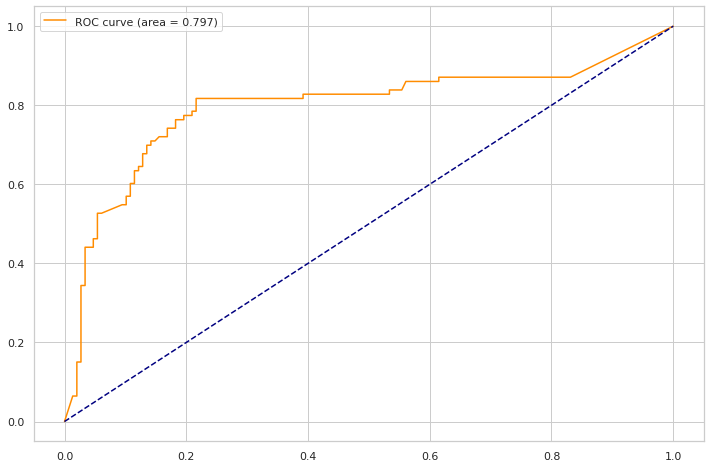

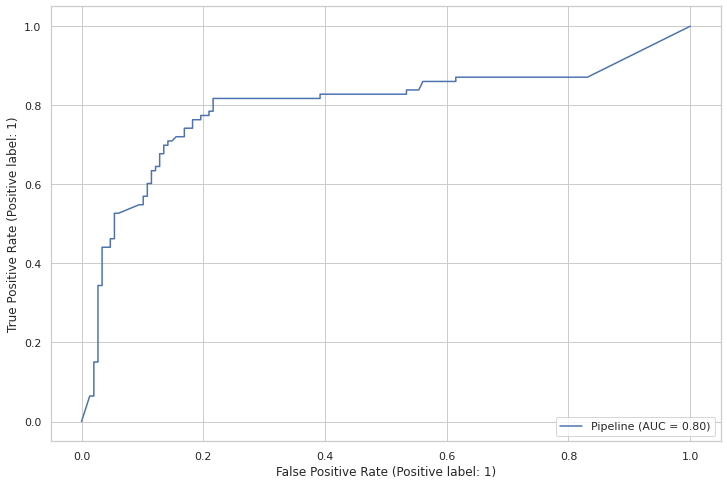

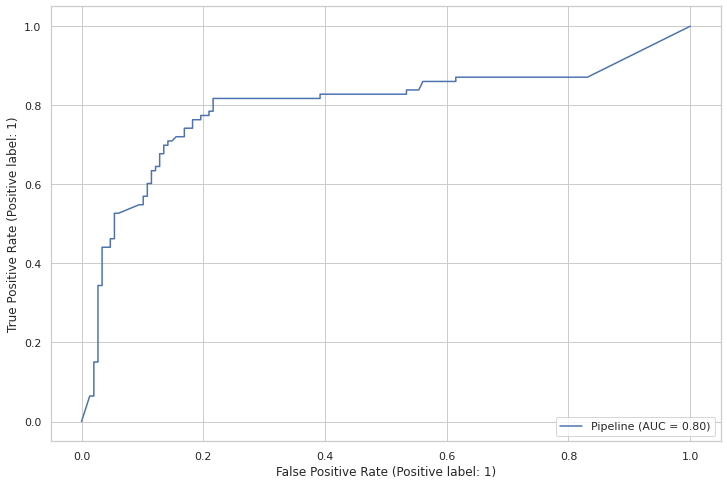

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=45, weights='distance'))])

In [418]:
param = {'weights':"distance", 'n_neighbors':45,  'metric':'minkowski', 'p' :2}
try_model(KNeighborsClassifier, x_train, y_train, x_test, y_test, param)


## Support Vector Machines

https://habr.com/ru/post/428503/

SVC
Accuracy: 0.8298755186721992
Precision: 0.8023255813953488
Recall: 0.7419354838709677
F1 score: 0.7709497206703911

              precision    recall  f1-score   support

           0       0.85      0.89      0.86       148
           1       0.80      0.74      0.77        93

    accuracy                           0.83       241
   macro avg       0.82      0.81      0.82       241
weighted avg       0.83      0.83      0.83       241

[[131  24]
 [ 17  69]]


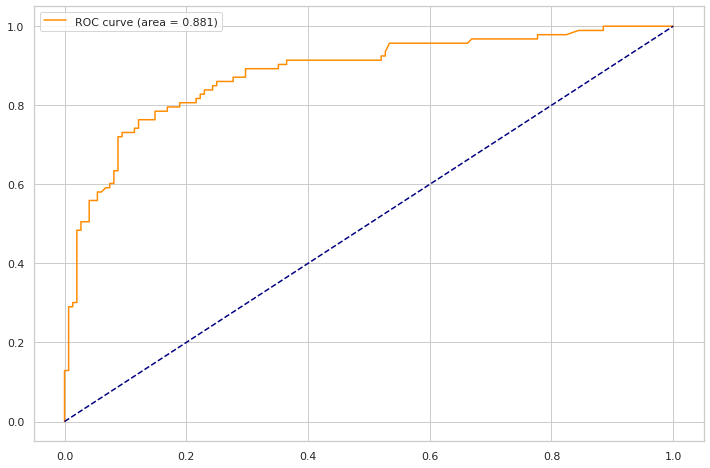

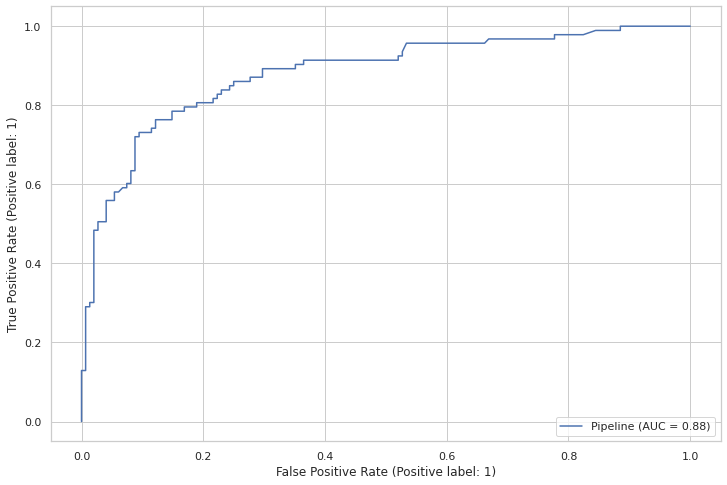

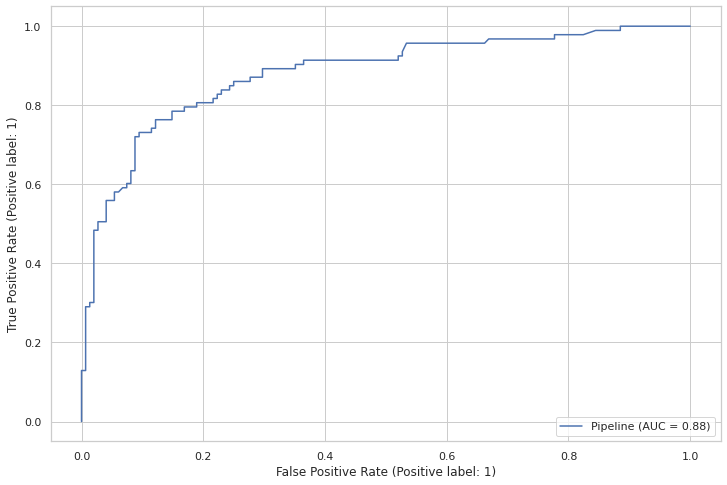

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, probability=True, random_state=7))])

In [419]:
param = dict(kernel = 'rbf', probability=True, random_state = 7, C = 5)
try_model(SVC, x_train, y_train, x_test, y_test, param)

## GridSearchCV

### GridSearchCV и LogisticRegression

In [420]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [421]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.13, 0.2, 0.15, 0.25,
                               0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 4.0, 4.5,
                               5.0, 5.1, 5, 5.5, 6.0, 10.0, 100.0, 1000.0],
                         'penalty': ['l2']},
             verbose=False)

LogisticRegression
Accuracy: 0.8381742738589212
Precision: 0.7872340425531915
Recall: 0.7956989247311828
F1 score: 0.7914438502673796

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       148
           1       0.79      0.80      0.79        93

    accuracy                           0.84       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.84      0.84      0.84       241

[[128  19]
 [ 20  74]]


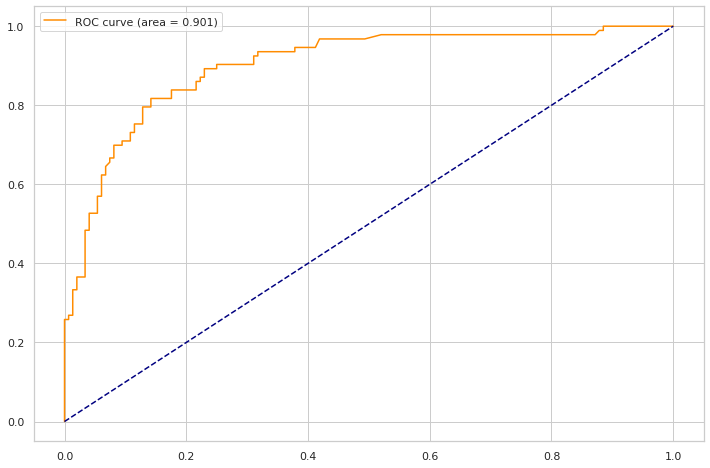

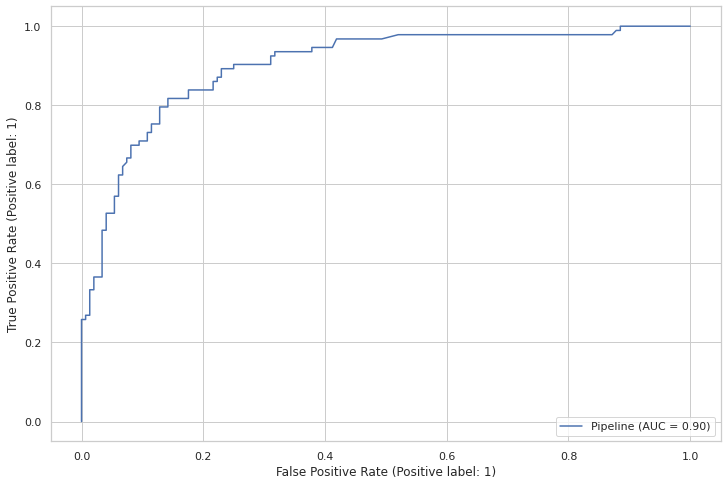

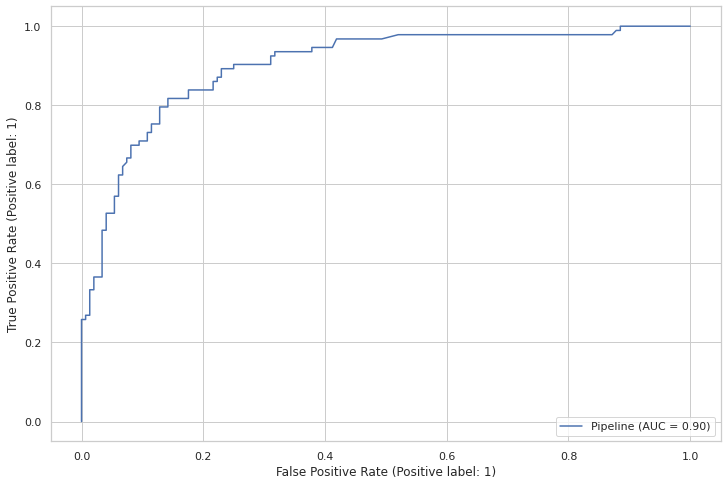

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.13, random_state=1))])

In [422]:
param = dict(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'],random_state=1)
try_model(LogisticRegression, x_train, y_train, x_test, y_test, param)

### Grid search и KNN classifier

In [423]:
knn = KNeighborsClassifier()
n_neighbors=range(1,50)
weights=['uniform','distance']
param = {'n_neighbors':n_neighbors, 'weights':weights}
grid2 = GridSearchCV(knn, param,verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
grid2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             verbose=False)

KNeighborsClassifier
Accuracy: 0.8008298755186722
Precision: 0.8082191780821918
Recall: 0.6344086021505376
F1 score: 0.710843373493976

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       148
           1       0.81      0.63      0.71        93

    accuracy                           0.80       241
   macro avg       0.80      0.77      0.78       241
weighted avg       0.80      0.80      0.80       241

[[134  34]
 [ 14  59]]


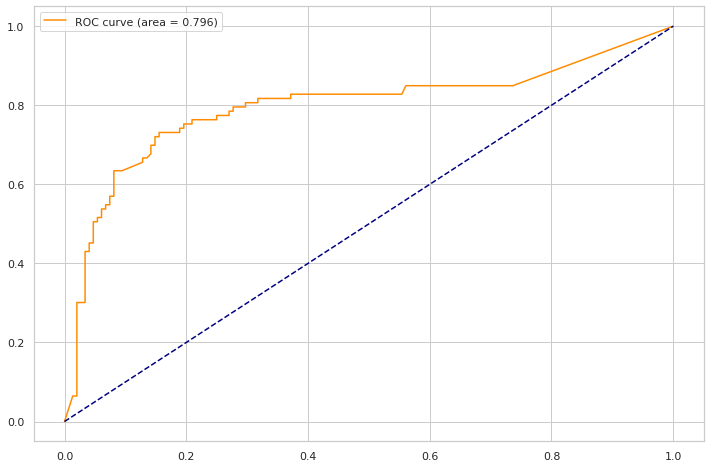

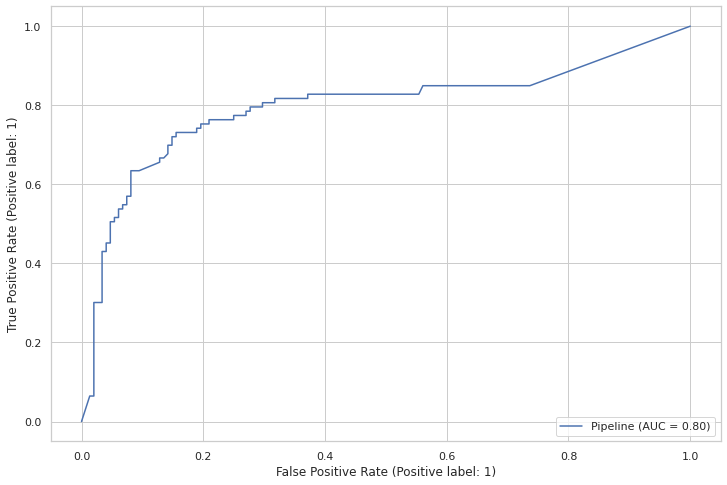

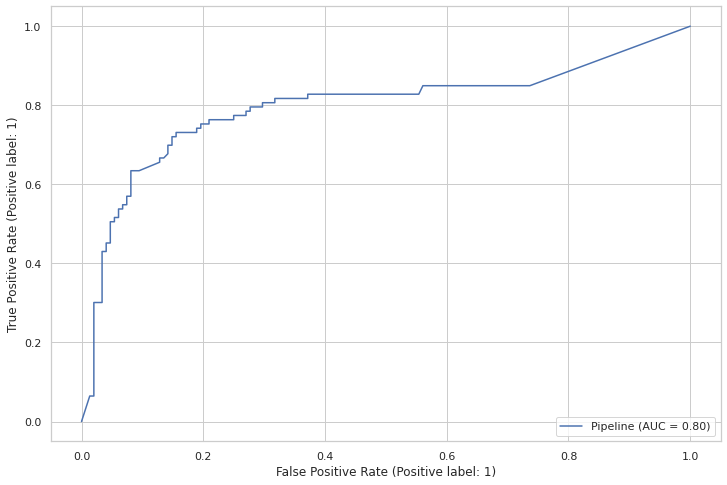

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=11,
                                      weights='distance'))])

In [424]:
param =  dict(n_neighbors = grid2.best_params_['n_neighbors'],weights = grid2.best_params_['weights'],
              n_jobs = -1)
try_model(KNeighborsClassifier, x_train, y_train, x_test, y_test, param)

### Grid и SVC

In [440]:
param = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'probability': [True], 'random_state':[5,7,8]}
grid_svc = GridSearchCV(SVC(), param, cv=5)
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf'),
                         'probability': [True], 'random_state': [5, 7, 8]})

SVC
Accuracy: 0.8298755186721992
Precision: 0.776595744680851
Recall: 0.7849462365591398
F1 score: 0.7807486631016043

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       148
           1       0.78      0.78      0.78        93

    accuracy                           0.83       241
   macro avg       0.82      0.82      0.82       241
weighted avg       0.83      0.83      0.83       241

[[127  20]
 [ 21  73]]


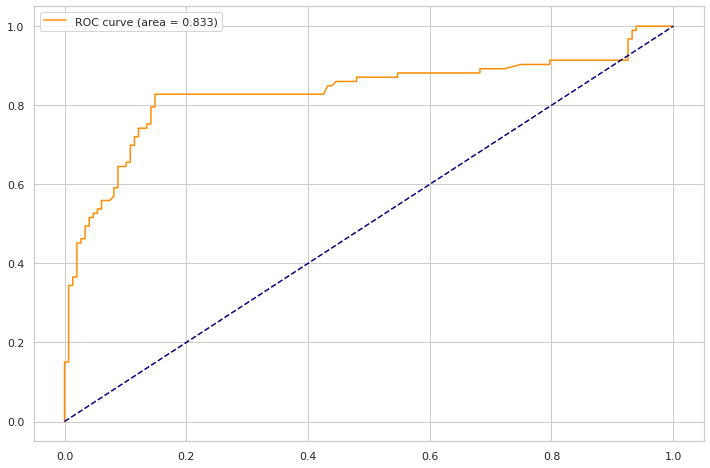

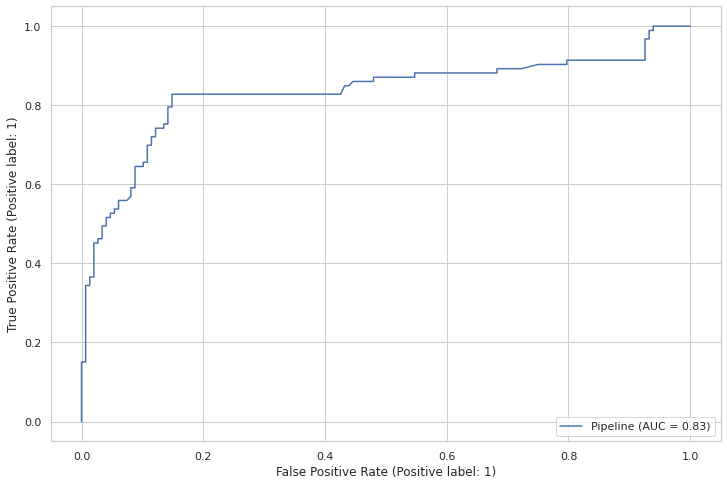

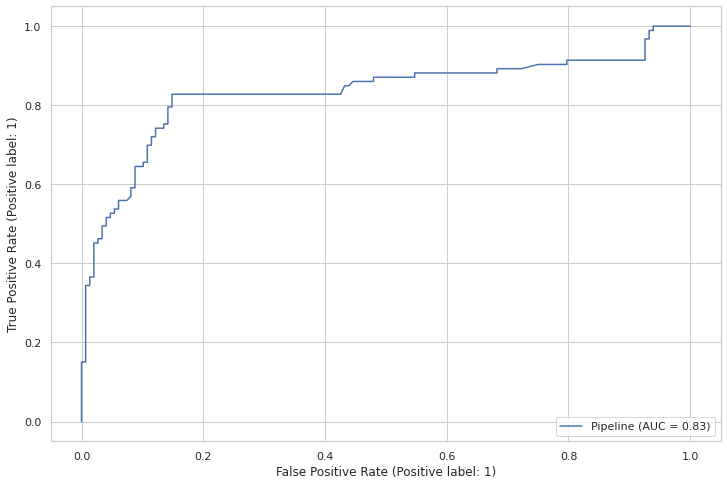

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, kernel='linear', probability=True, random_state=5))])

In [441]:
try_model(SVC, x_train, y_train, x_test, y_test, grid_svc.best_params_)

## Sequential_Feature_Selector
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [428]:
from sklearn.feature_selection import SequentialFeatureSelector

### for KNeighborsClassifier

In [429]:
sfs = SequentialFeatureSelector(KNeighborsClassifier())#, n_features_to_select=9)
sfs.fit(x_train, y_train)
#sfs.get_support()
best_features = sfs.get_feature_names_out()
print(best_features)

['Тип_Mr' 'Тип_others' 'Зона_B' 'Зона_E' 'Зона_F' 'Зона_Non' 'Зона_T'
 'Группа_3' 'Группа_4' 'Группа_5' 'Группа_6' 'Группа_7' 'Семья_2'
 'Семья_4' 'Семья_5' 'Семья_6' 'Семья_7' 'Семья_10' 'Возрастная_группа_1'
 'Возрастная_группа_8' 'Возрастная_группа_9' 'Возрастная_группа_11'
 'Возрастная_группа_12' 'Возрастная_группа_13']


In [447]:
knn = KNeighborsClassifier()
n_neighbors=range(1,50)
weights=['uniform','distance','manhatan']
param = {'n_neighbors':n_neighbors, 'weights':weights}
grid2 = GridSearchCV(knn, param,verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
grid2.fit(x_train[best_features], y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance', 'manhatan']},
             verbose=False)

KNeighborsClassifier
Accuracy: 0.8132780082987552
Precision: 0.8076923076923077
Recall: 0.6774193548387096
F1 score: 0.7368421052631579

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       148
           1       0.81      0.68      0.74        93

    accuracy                           0.81       241
   macro avg       0.81      0.79      0.80       241
weighted avg       0.81      0.81      0.81       241

[[133  30]
 [ 15  63]]


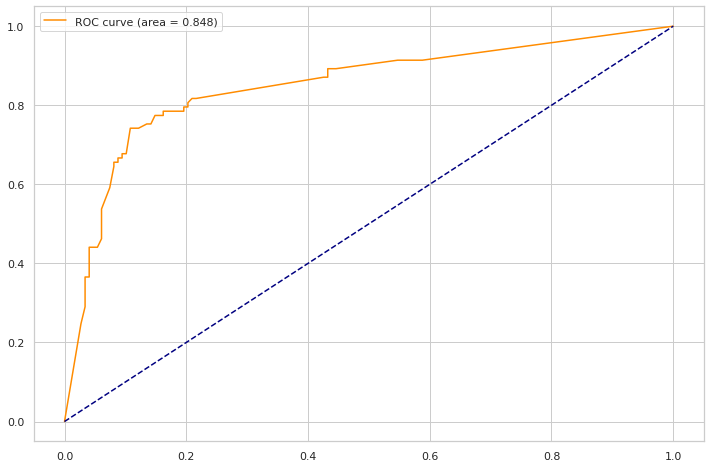

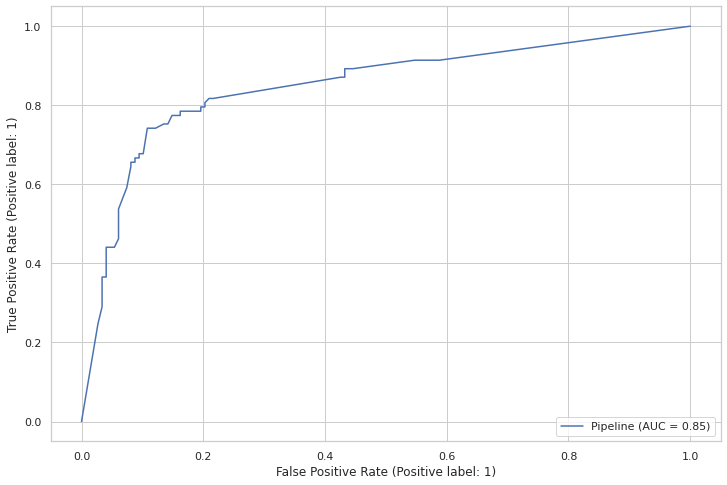

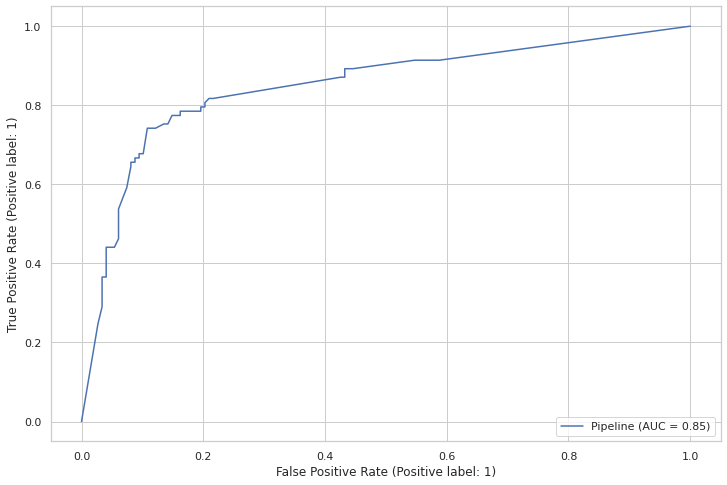

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=11, weights='distance'))])

In [448]:
try_model(KNeighborsClassifier, x_train[best_features], y_train, x_test[best_features], y_test, grid2.best_params_)

### for LogisticRegression

In [432]:
sfs = SequentialFeatureSelector(LogisticRegression(solver='liblinear', penalty='l1'))#, n_features_to_select=10)
sfs.fit(x_train, y_train)
sfs.get_support()
best_features = sfs.get_feature_names_out()
print(best_features)

['Пол' 'Класс_2' 'Порт_отправки_Q' 'Тип_Mr' 'Тип_Mrs' 'Тип_others'
 'Зона_C' 'Зона_F' 'Зона_G' 'Зона_T' 'Группа_2' 'Группа_4' 'Группа_5'
 'Группа_6' 'Группа_7' 'Семья_1' 'Семья_3' 'Семья_4' 'Семья_5' 'Семья_7'
 'Уровень_тарифа_Low_Mid' 'Возрастная_группа_1' 'Возрастная_группа_2'
 'Возрастная_группа_3']


In [433]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1)
grid.fit(x_train[best_features],y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.13, 0.2, 0.15, 0.25,
                               0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 4.0, 4.5,
                               5.0, 5.1, 5.5, 6.0, 10.0, 100.0, 1000.0],
                         'penalty': ['l2']},
             verbose=False)

LogisticRegression
Accuracy: 0.8340248962655602
Precision: 0.7849462365591398
Recall: 0.7849462365591398
F1 score: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       148
           1       0.78      0.78      0.78        93

    accuracy                           0.83       241
   macro avg       0.82      0.82      0.82       241
weighted avg       0.83      0.83      0.83       241

[[128  20]
 [ 20  73]]


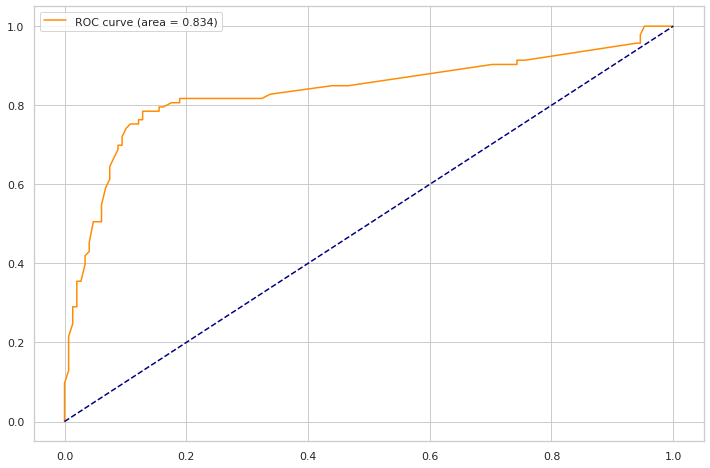

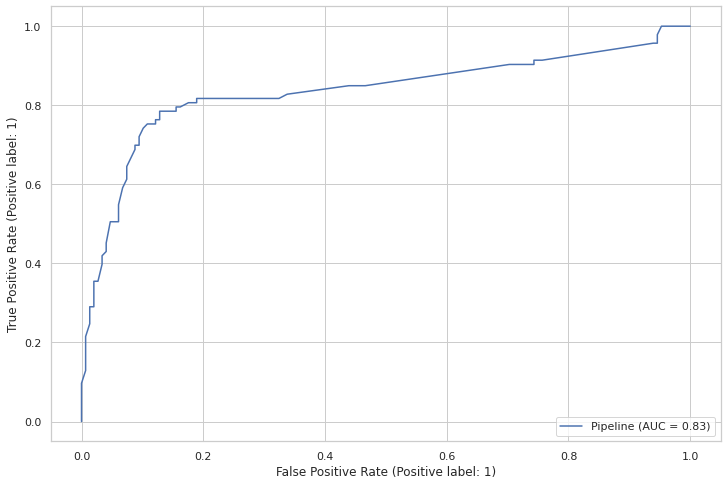

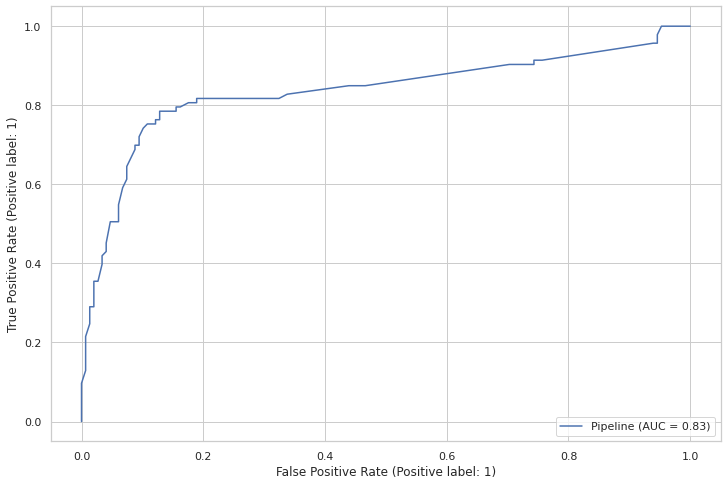

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=4.0, random_state=5))])

In [439]:
param = dict(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'],random_state=5)
try_model(LogisticRegression, x_train[best_features], y_train, x_test[best_features], y_test, param)

### for Support Vector Machines

тут долго работает, для сервера отключил

In [435]:
#sfs = SequentialFeatureSelector(SVC(kernel = 'rbf', probability=True, random_state = 1, C = 2),
                                #n_features_to_select=10)
#sfs.fit(x_train, y_train)
#sfs.get_support()
#best_features = sfs.get_feature_names_out()
#print(best_features)

In [436]:
#param = dict(kernel = 'rbf', probability=True, random_state = 1, C = 2)
#try_model(SVC, x_train[best_features], y_train, x_test[best_features], y_test, param)

## Cross

тесты

In [437]:
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit, cross_validate

## Create pipeline
clf = make_pipeline(preprocessing.StandardScaler(), SVC())

## Define CV methods
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=8)

scaler = preprocessing.StandardScaler().fit(X)
X_transformed = scaler.transform(X)

## CV results
print('K-fold CV:', sorted(cross_val_score(clf, X_transformed, y, cv=kfold, scoring='f1'), reverse = 1))
print('Shuffle CV:', sorted(cross_val_score(clf, X_transformed, y, cv=shuffsplit, scoring='f1'), reverse = 1))

K-fold CV: [0.8270676691729324, 0.7769784172661871, 0.762589928057554, 0.7552447552447553, 0.735294117647059]
Shuffle CV: [0.8181818181818181, 0.7972027972027971, 0.7755102040816326, 0.7323943661971831, 0.7076923076923077]


# Выводы

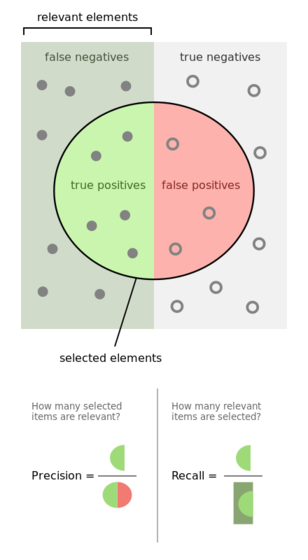

В задаче на Kaggle метрикой выбрана обычная Accuracy, что вполне оправдано ввиду несильной разсбалансированостью класов и отсутствием рисков в неправильном учете выжившего отнесенного к выжившим и наоборот. Это не вариант со спамом или поисклм сбоя.

Имеющая разбалансированость устраняется правильным учетом веса класс в выборках при разделении и тут это можно учесть.

При выборе этой метрики впереди LogisticRegression, причем AUC(площадб по ROC кривой) у нее достикает 90%, следом идет SVC из SVM

KNN от них отстает, но и при поиске гиперпараметров повышает значительного точность.

Но как правило, самое оптимальное, это использывать  F-метрику или ее интегральную версию AUC. В ней можно также учесть, что важнее не найти нужный класс или в нем ощибиться, по умолчанию между этим баланс установлен в настройках(например F1)

